In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df = pd.read_csv('year2000(1).csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
0,0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
1,1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,NO,1,0,2,Oct,1
2,2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1
3,3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,NO,0,0,2,Oct,0
4,4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,YES,1,1,2,Oct,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031273 entries, 0 to 1031272
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1031273 non-null  int64  
 1   Year               1031273 non-null  int64  
 2   Month              1031273 non-null  int64  
 3   DayofMonth         1031273 non-null  int64  
 4   DayOfWeek          1031273 non-null  int64  
 5   CRSDepTime         1031273 non-null  int64  
 6   CRSArrTime         1031273 non-null  int64  
 7   UniqueCarrier      1031273 non-null  object 
 8   FlightNum          1031273 non-null  int64  
 9   ActualElapsedTime  1031273 non-null  float64
 10  CRSElapsedTime     1031273 non-null  int64  
 11  ArrDelay           1031273 non-null  float64
 12  DepDelay           1031273 non-null  float64
 13  Origin             1031273 non-null  object 
 14  Dest               1031273 non-null  object 
 15  Distance           1031273 non-n

In [5]:
df = df.replace({'IsDepDelayed': {'YES': 1, 
                                'NO': 0}})
  
# show the dataframe
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
0,0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,YES,1,1,1,2,Oct,1
1,1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,YES,0,1,0,2,Oct,1
2,2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,YES,1,1,1,2,Oct,1
3,3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,NO,0,0,0,2,Oct,0
4,4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,YES,1,1,1,2,Oct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031268,1048570,2000,12,14,1,830,2,PA (1),244,70.0,1,10.0,0.0,DCA,LGA,214.0,YES,0,1,0,2,Dec,1
1031269,1048571,2000,12,15,2,830,2,PA (1),244,66.0,1,6.0,0.0,DCA,LGA,214.0,YES,0,1,0,2,Dec,1
1031270,1048572,2000,12,16,3,830,2,PA (1),244,54.0,1,29.0,35.0,DCA,LGA,214.0,YES,1,1,1,2,Dec,1
1031271,1048573,2000,12,17,4,830,2,PA (1),244,70.0,1,10.0,0.0,DCA,LGA,214.0,YES,0,1,0,2,Dec,1


In [6]:
df = df.replace({'IsArrDelayed': {'YES': 1, 
                                'NO': 0}})
  
# show the dataframe
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus
0,0,2000,10,14,3,730,2,PS,1451,91.0,1,23.0,11.0,SAN,SFO,447.0,1,1,1,1,2,Oct,1
1,1,2000,10,15,4,730,2,PS,1451,94.0,1,14.0,-1.0,SAN,SFO,447.0,1,0,1,0,2,Oct,1
2,2,2000,10,17,6,730,2,PS,1451,97.0,1,29.0,11.0,SAN,SFO,447.0,1,1,1,1,2,Oct,1
3,3,2000,10,18,7,730,2,PS,1451,78.0,1,-2.0,-1.0,SAN,SFO,447.0,0,0,0,0,2,Oct,0
4,4,2000,10,19,1,730,2,PS,1451,93.0,1,33.0,19.0,SAN,SFO,447.0,1,1,1,1,2,Oct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031268,1048570,2000,12,14,1,830,2,PA (1),244,70.0,1,10.0,0.0,DCA,LGA,214.0,1,0,1,0,2,Dec,1
1031269,1048571,2000,12,15,2,830,2,PA (1),244,66.0,1,6.0,0.0,DCA,LGA,214.0,1,0,1,0,2,Dec,1
1031270,1048572,2000,12,16,3,830,2,PA (1),244,54.0,1,29.0,35.0,DCA,LGA,214.0,1,1,1,1,2,Dec,1
1031271,1048573,2000,12,17,4,830,2,PA (1),244,70.0,1,10.0,0.0,DCA,LGA,214.0,1,0,1,0,2,Dec,1


In [7]:
df['IsDepDelayed'].value_counts()

0    597581
1    433692
Name: IsDepDelayed, dtype: int64

In [8]:
df.IsDepDelayed.value_counts(normalize=True)

0    0.57946
1    0.42054
Name: IsDepDelayed, dtype: float64

In [9]:
df['IsArrDelayed'].value_counts()

1    632827
0    398446
Name: IsArrDelayed, dtype: int64

In [10]:
df.IsArrDelayed.value_counts(normalize=True)

1    0.613637
0    0.386363
Name: IsArrDelayed, dtype: float64

The data is unbalance with a 61.36% of the flights on time and 38.63% being delayed.

In [11]:
df.CRSArrTime.value_counts(normalize=True)

3    0.381742
4    0.317957
2    0.280814
1    0.019488
Name: CRSArrTime, dtype: float64

In [12]:
def scaling_check(data):
    
    case_count = df['IsArrDelayed'].value_counts() # 'data' is our input which will be any of the 3 dataframes created
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Flight Delay On Arrival', fontsize=16)
    plt.xlabel('IsArrDelayed', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['YES=1', 'NO=0'])
    plt.show()

Legend:
1    632827
0    398446
Name: IsArrDelayed, dtype: int64


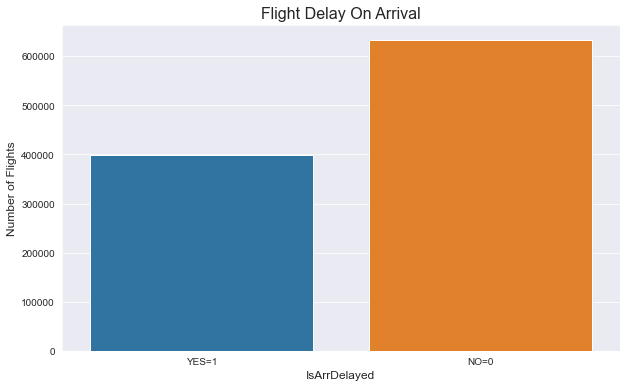

In [13]:
scaling_check(df)

In [14]:
def scaling_check(data):
    
    case_count = df['IsDepDelayed'].value_counts() # 'data' is our input which will be any of the 3 dataframes created
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Flight Delay On Depature', fontsize=16)
    plt.xlabel('IsDepDelayed', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['YES=1', 'NO=0'])
    plt.show()

Legend:
0    597581
1    433692
Name: IsDepDelayed, dtype: int64


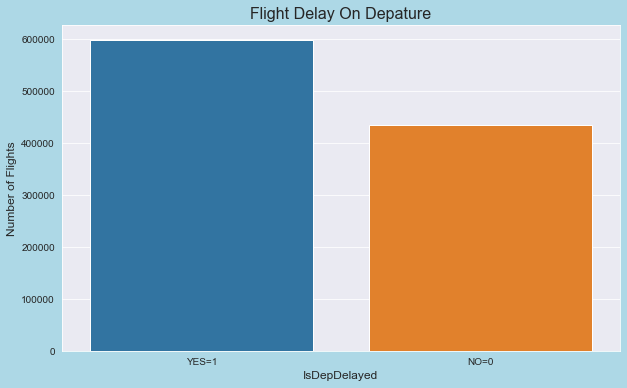

In [15]:
scaling_check(df)

### For Arrival

In [16]:
count_0 = 632827
count_1 = 398446


print(count_0)
print(count_1)


632827
398446


In [17]:
initial_bias = np.log([count_1/count_0])
initial_bias

weight_for_0 = (1/count_0)*(count_0 + count_1)/2.0
weight_for_1 = (1/count_1)*(count_0 + count_1)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.81
Weight for class 1: 1.29


### For Departure

In [18]:
count_2 = 597581
count_3 = 433692


print(count_0)
print(count_1)

632827
398446


In [19]:
initial_bias = np.log([count_3/count_2])
initial_bias

weight_for_2 = (1/count_2)*(count_2 + count_3)/2.0
weight_for_3 = (1/count_3)*(count_2 + count_3)/2.0

class_weight = {0: weight_for_2, 1: weight_for_3}

print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))

Weight for class 2: 0.86
Weight for class 3: 1.19


#### Calculating the weight to use later for the imbalanced dataset

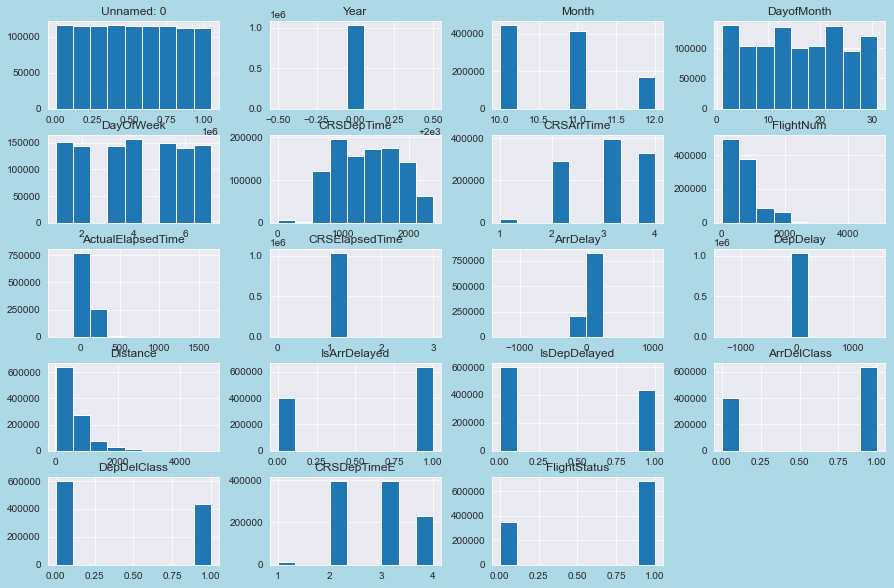

In [20]:
df.hist(figsize  = [15, 10],bins=9) 
plt.show()

## Categoricals

In [21]:
df.dtypes


Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
CRSDepTime             int64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime         int64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
IsArrDelayed           int64
IsDepDelayed           int64
ArrDelClass            int64
DepDelClass            int64
CRSDepTimeE            int64
MONTH                 object
FlightStatus           int64
dtype: object

In [22]:
UniqueCarrier_dummies = pd.get_dummies(df['UniqueCarrier'], prefix='UniqueCarrier', drop_first=True)
Dest_dummies = pd.get_dummies(df['Dest'], prefix='Dest', drop_first=True)
CRSDepTime_dummies = pd.get_dummies(df['CRSDepTime'], prefix='CRSDepTime', drop_first=True)
CRSArrTime_dummies = pd.get_dummies(df['CRSArrTime'], prefix='CRSArrTime', drop_first=True) 
Month_dummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
DayOfWeek_dummies = pd.get_dummies(df['DayOfWeek'], prefix='DayOfWeek', drop_first=True)

In [23]:
df = df.drop(['UniqueCarrier', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayOfWeek', 'ActualElapsedTime', 'ArrDelay', 'CRSElapsedTime', 'Distance', 'DayofMonth'], axis=1)

In [24]:
df = pd.concat([df, UniqueCarrier_dummies, Dest_dummies, CRSDepTime_dummies, CRSArrTime_dummies, Month_dummies, DayOfWeek_dummies], axis=1)

In [25]:
df.head(2)


,Unnamed: 0,Year,FlightNum,DepDelay,IsArrDelayed,IsDepDelayed,ArrDelClass,DepDelClass,CRSDepTimeE,MONTH,FlightStatus,UniqueCarrier_AS,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EA,UniqueCarrier_HP,UniqueCarrier_NW,UniqueCarrier_PA (1),UniqueCarrier_PI,UniqueCarrier_PS,UniqueCarrier_TW,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,Dest_ABQ,Dest_ACV,Dest_AGS,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_APF,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BLI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CCR,Dest_CDV,Dest_CHA,Dest_CHO,Dest_CHS,Dest_CID,Dest_CLE,Dest_CLT,Dest_CMH,Dest_CMI,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CSG,Dest_CVG,Dest_CWA,Dest_DAB,Dest_DAL,Dest_DAY,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DLH,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EAU,Dest_ELM,Dest_ELP,Dest_ERI,Dest_EUG,Dest_EVV,Dest_EWR,Dest_EYW,Dest_FAI,Dest_FAR,Dest_FAT,Dest_FAY,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FNT,Dest_FOE,Dest_FSD,Dest_FWA,Dest_GCN,Dest_GEG,Dest_GFK,Dest_GJT,Dest_GNV,Dest_GPT,Dest_GRB,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GTF,Dest_GUC,Dest_GUM,Dest_HDN,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILG,Dest_ILM,Dest_IND,Dest_ISO,Dest_ISP,Dest_ITH,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAX,Dest_LBB,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LSE,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_ORH,Dest_OTZ,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIE,Dest_PIT,Dest_PNS,Dest_PSC,Dest_PSG,Dest_PSP,Dest_PUB,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RIC,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROR,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SCC,Dest_SCK,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJU,Dest_SLC,Dest_SMF,Dest_SNA,Dest_SPN,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUX,Dest_SYR,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVL,Dest_TYS,Dest_UCA,Dest_VPS,Dest_WRG,Dest_YAK,Dest_YAP,Dest_YKM,Dest_YUM,CRSDepTime_5,CRSDepTime_8,CRSDepTime_9,CRSDepTime_10,CRSDepTime_11,CRSDepTime_14,CRSDepTime_15,CRSDepTime_19,CRSDepTime_20,CRSDepTime_23,CRSDepTime_24,CRSDepTime_25,CRSDepTime_28,CRSDepTime_30,CRSDepTime_31,CRSDepTime_32,CRSDepTime_35,CRSDepTime_36,CRSDepTime_38,CRSDepTime_39,CRSDepTime_40,CRSDepTime_41,CRSDepTime_42,CRSDepTime_45,CRSDepTime_47,CRSDepTime_50,CRSDepTime_51,CRSDepTime_52,CRSDepTime_54,CRSDepTime_55,CRSDepTime_59,CRSDepTime_100,CRSDepTime_101,CRSDepTime_105,CRSDepTime_107,CRSDepTime_108,CRSDepTime_110,CRSDepTime_115,CRSDepTime_120,CRSDepTime_122,CRSDepTime_124,CRSDepTime_125,CRSDepTime_128,CRSDepTime_130,CRSDepTime_135,CRSDepTime_140,CRSDepTime_142,CRSDepTime_146,CRSDepTime_150,CRSDepTime_154,CRSDepTime_155,CRSDepTime_159,CRSDepTime_200,CRSDepTime_201,CRSDepTime_205,CRSDepTime_210,CRSDepTime_220,CRSDepTime_225,CRSDepTime_230,CRSDepTime_235,CRSDepTime_240,CRSDepTime_250,CRSDepTime_254,CRSDepTime_301,CRSDepTime_305,CRSDepTime_306,CRSDepTime_310,CRSDepTime_320,CRSDepTime_322,CRSDepTime_325,CRSDepTime_333,CRSDepTime_340,CRSDepTime_405,CRSDepTime_406,CRSDepTime_410,CRSDepTime_411,CRSDepTime_415,CRSDepTime_425,CRSDepTime_439,CRSDepTime_440,CRSDepTime_445,CRSDepTime_456,CRSDepTime_500,CRSDepTime_505,CRSDepTime_510,CRSDepTime_511,CRSDepTime_514,CRSDepTime_515,CRSDepTime_520,CRSDepTime_525,CRSDepTime_528,CRSDepTime_530,CRSDepTime_531,CRSDepTime_534,CRSDepTime_535,CRSDepTime_536,CRSDepTime_539,CRSDepTime_540,CRSDepTime_543,CRSDepTime_545,CRSDepTime_550,CRSDepTime_555,CRSDepTime_557,CRSDepTime_600,CRSDepTime_601,CR

In [26]:
df.shape


(1031273, 1409)

In [27]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

#### Decision Tree 

In [28]:
df = df.drop(['MONTH'],axis=1)

In [29]:
df.dtypes

Unnamed: 0        int64
Year              int64
FlightNum         int64
DepDelay        float64
IsArrDelayed      int64
                 ...   
DayOfWeek_3       uint8
DayOfWeek_4       uint8
DayOfWeek_5       uint8
DayOfWeek_6       uint8
DayOfWeek_7       uint8
Length: 1408, dtype: object

In [30]:
df['DepDelay']=df['DepDelay'].astype(int)

In [31]:
# Create features (X) and labels (y)
y = df['FlightStatus']
X = df.drop(['FlightStatus'], axis=1)

In [32]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20, random_state=50)

In [33]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [34]:
y_pred = clf_entropy.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, f1_score

In [36]:
# Evaluate the model 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred, average="macro"))

[[277874      0]
 [ 40359 506785]]
0.9470009305486893


In [37]:
print(accuracy_score(y_test, y_pred))

0.9510810673221675


In [38]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 95.11%


In [39]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93    277874
           1       1.00      0.93      0.96    547144

    accuracy                           0.95    825018
   macro avg       0.94      0.96      0.95    825018
weighted avg       0.96      0.95      0.95    825018


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,277874,0,277874
1,40359,506785,547144
All,318233,506785,825018


In [40]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,277874,0,277874
1,40359,506785,547144
All,318233,506785,825018


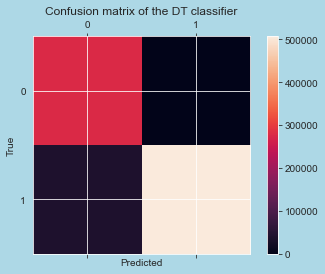

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the DT classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()